## Algorytm roju cząstek (PSO - particle swarm optimization)

Inspirowany jest procesami zachodzącymi w stadach ryb bądź ptaków. Podobnie jak stado ptaków, rój podąża za przywódcą, bieżącym, najlepszym znanym rozwiązaniem, przyspieszając i zmieniając kierunek, gdy lepsze rozwiązanie zostanie znalezione. W naturze można te zachowania odnieść np. do poszukiwania jedzenia. 


Zaproponowany w 1995 roku przez R.C.Eberharta (elektrotechnika) i J. Kennediego (psychologa społecznego) i pierwotnie skonstruowany do prowadzenia symulacji zachowań społecznych. W praktyce PSO i jego modyfikacje mają wiele cech wspólnych z algorytmami genetycznymi, jednak nie korzysta się w nich z operatorów genetycznych, takich jak krzyżowanie czy mutacja. 

Populacja możliwych rozwiązań traktowana jest jako rój, a każdy jej element (możliwe rozwiązanie problemu) jest cząstką. Kolejne kroki algorytmu sprawiają, że cząstki przemieszczają się, symulując adaptację roju do środowiska, czyli poszukują optimum. W roju występuje lider, czyli cząstka o najlepszym położeniu. Każda cząstka ma też przypisanych sąsiadów, którzy podążają razem z nią. Każda cząstka jest więc w ruchu pod wpływem lokalnej, najlepszej pozycji lidera i kieruje się również w jego stronę. Takie zachowanie powoduje przemieszczanie cząstek w kierunku najlepszych rozwiązań. Dużą zaletą jest pamiętanie stanu poprzedniego, co pozwala na eksplorację znanej okolicy, a jednoczenie nie hamuje eksplorowania przestrzeni dalszych.

![pso_gif.gif](https://www.scottcondron.com/images/copied_from_nb/my_icons/pso_gif.gif "Source: Wikipedia")

Podstawowy algorytm PSO można sformułować w następujący sposób:
1. Losowe tworzenie próby początkowej (zbioru punktów reprezentujących cząstki) – dla każdej cząstki określone zostają położenie i prędkość początkowa.
2. Obliczenie funkcji przystosowania dla próby.
3. Wybór najlepszego rozwiązania – określenie najlepszego sąsiada oraz wytypowanie lidera roju.
4. Sprawdzenie kryterium stopu.
5. Tworzenie kolejnej próby według zdefiniowanej reguły – nowy wektor prędkości obliczany jest na podstawie parametrów cząstki, jej najlepszego sąsiada oraz lidera roju, a nowe położenie cząstki określane jest na podstawie jej parametrów (położenia oraz nowego wektora prędkości).
6. Iteracja od punktu 2.

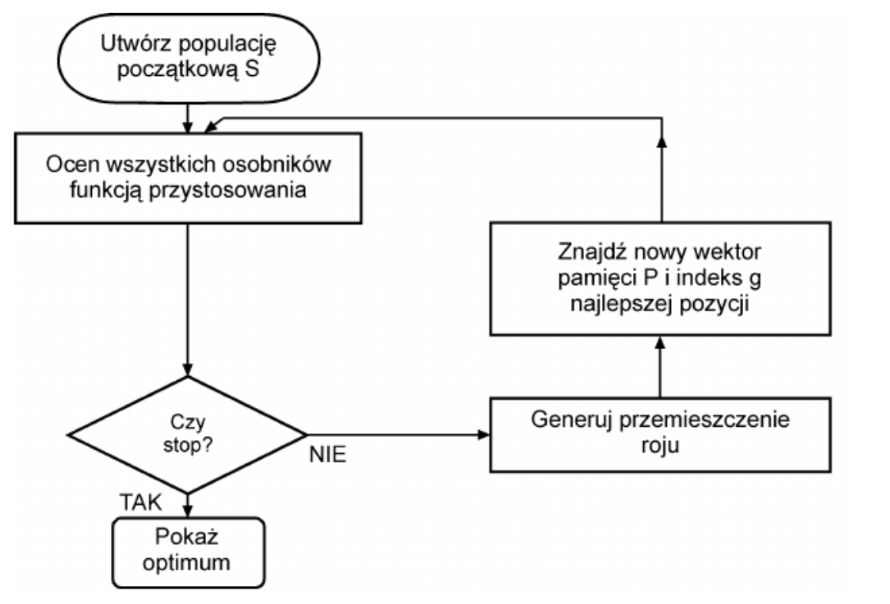

Omówmy przypadek zastosowania PSO do optymalizacji **funkcji kulistej (sphere function)** - jest ona standardową funkcją używaną jako problem testowy wydajności dla algorytmów optymalizacyjnych.

$f(x_1 \cdots x_n) = \sum_{i=1}^n x_i^2$

$\text{minimum w }f(0, \cdots, 0) = 0$

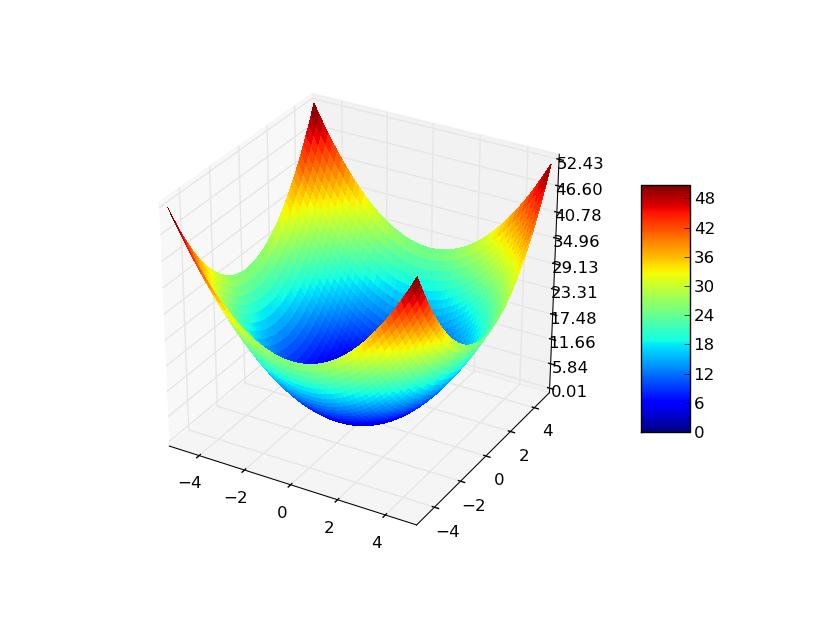

### Kilka słów o parametrach:

w - współczynnik inercji (inertia weight)- decyduje o stopniu swobody ruchu cząstek w przestrzeni zmiennych. 

c1 - tzw. the cognitive scaling constant

c2 - tzw. the social scaling constant

Stałe c1 i c2 to parametry skalujące, również określane jako parametry zaufania, gdzie c1 wyraża zaufanie, jakie cząstka ma do siebie, podczas gdy c2 wyraża zaufanie, jakie cząstka ma do swoich sąsiadów.

Przy c1 = c2 = 0 cząstki lecą z obecną prędkością, dopóki nie uderzą w granicę przestrzeni poszukiwań (zakładając brak bezwładności). Jeśli c1 > 0 i c2 = 0, wszystkie cząstki są niezależne. Każda cząstka znajduje najlepszą pozycję w swoim sąsiedztwie, zastępując obecną najlepszą pozycję, jeśli nowa pozycja jest lepsza. 
Jeśli c2 > 0 i c1 = 0, cały rój jest przyciągany do jednego punktu.



In [ ]:
import numpy as np
# zdefiniowanie funkcji przystosowania
def sphere(x):
    return np.sum(np.square(x))


# stwórzmy tablice do wyrysowania później przebiegu algorytmu
avgs = []
bests_fitness = []

# zdefiniowanie algorytmu roju cząstek
def pso(cost_func, dim=2, num_particles=30, max_iter=30, w=0.5, c1=1, c2=2):
    
    # zainicjowanie cząstek i ich prędkości
    particles = np.random.uniform(-5.12, 5.12, (num_particles, dim))
    velocities = np.zeros((num_particles, dim))

    # inicjalizacja najlepszych pozycji cząstek oraz funkcji przystosowania (fitness function)
    best_positions = np.copy(particles)
    best_fitness = np.array([cost_func(p) for p in particles])
    swarm_best_position = best_positions[np.argmin(best_fitness)]
    swarm_best_fitness = np.min(best_fitness)

    # iterujemy sie przez podana w funkcji ilosc iteracji, aktualizujac prednosci i pozycji każdej z cząstek
    for i in range(max_iter):
        # aktualizacja wartości prędkości cząstek
        r1 = np.random.uniform(0, 1, (num_particles, dim))
        r2 = np.random.uniform(0, 1, (num_particles, dim))
        velocities = w * velocities + c1 * r1 * (best_positions - particles) + c2 * r2 * (swarm_best_position - particles)

        # aktualizacja pozycji cząstek
        particles += velocities

        # ewaluacja funkcji przystosowania dla każdej z cząstek
        fitness_values = np.array([cost_func(p) for p in particles])
        
        # zapisujemy średnią wartość funkcji przystosowania w roju
        avgs.append(np.mean(fitness_values))
        # aktualizacja najlepszych pozycji i funkcji przystosowania
        improved_indices = np.where(fitness_values < best_fitness)
        best_positions[improved_indices] = particles[improved_indices]
        best_fitness[improved_indices] = fitness_values[improved_indices]
        if np.min(fitness_values) < swarm_best_fitness:
            swarm_best_position = particles[np.argmin(fitness_values)]
            swarm_best_fitness = np.min(fitness_values)
            
        # zapisujemy najlepszą wartość funkcji przystosowania
        bests_fitness.append(swarm_best_fitness)
        print('Epoch:',i)
        print('Swarm best position:',swarm_best_position)
        print('Swarm best fitness:', swarm_best_fitness)
    # zwrócenie najlepszego wyniku znalezionego przez algorytm
    return swarm_best_position, swarm_best_fitness

# uruchomienie algorytmu PSO dla wybranej funkcji
solution, fitness = pso(sphere)
print('---')
# wydrukowanie wyników
print('Rozwiązanie:', solution)
print('Wartość funkcji przystosowania:', fitness)

Epoch: 0
Swarm best position: [-0.51899134 -0.08317697]
Swarm best fitness: 0.27627042307098776
Epoch: 1
Swarm best position: [-0.46057083  0.2364763 ]
Swarm best fitness: 0.26804652839012083
Epoch: 2
Swarm best position: [-0.06770769 -0.30996564]
Swarm best fitness: 0.10066303133670222
Epoch: 3
Swarm best position: [-0.09621804 -0.01523283]
Swarm best fitness: 0.00948995100386052
Epoch: 4
Swarm best position: [ 0.03843201 -0.55765944]
Swarm best fitness: 0.00948995100386052
Epoch: 5
Swarm best position: [-0.01684328 -0.00165793]
Swarm best fitness: 0.000286444939506738
Epoch: 6
Swarm best position: [-0.49949955  0.16510918]
Swarm best fitness: 0.000286444939506738
Epoch: 7
Swarm best position: [-0.71772178  0.12483814]
Swarm best fitness: 0.000286444939506738
Epoch: 8
Swarm best position: [-0.76632292 -0.01554201]
Swarm best fitness: 0.000286444939506738
Epoch: 9
Swarm best position: [-0.75629338 -0.08368383]
Swarm best fitness: 0.000286444939506738
Epoch: 10
Swarm best position: [-0.

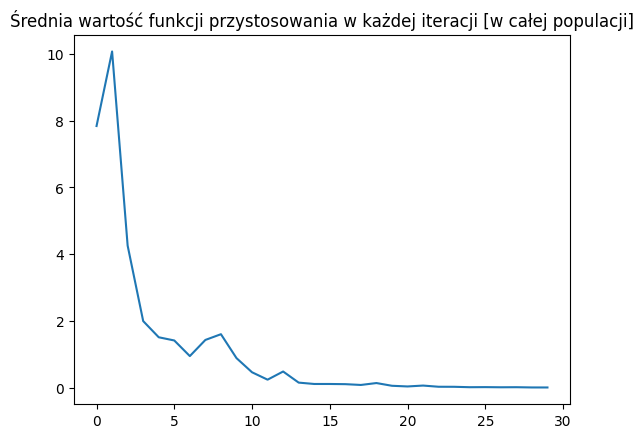

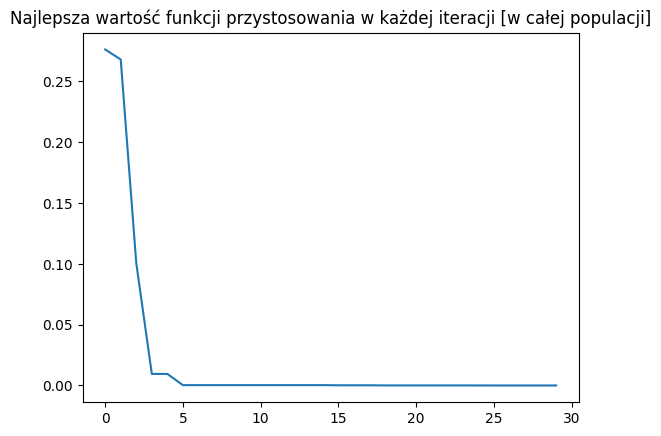

In [ ]:
import matplotlib.pyplot as plt
plt.plot(avgs)
plt.title("Średnia wartość funkcji przystosowania w każdej iteracji [w całej populacji]")
plt.show()
print('    ')
plt.plot(bests_fitness)
plt.title("Najlepsza wartość funkcji przystosowania w każdej iteracji [w całej populacji]")
plt.show()

## Zadania do samodzielnego wykonania

1.

Proszę, korzystając z algorytmu roju cząstek znaleźć minimum funkcji 

$f(x,y)= 𝑥^{2} + 𝑦^{2} − 20(cos 𝜋𝑥 + cos 𝜋𝑦 − 2)$ w przedziale 𝑥, 𝑦 ∈ [−10,10],  


przy założeniu że rozwiązanie jest reprezentowane przez wektor [𝑥𝑖, 𝑦𝑖]. 

Proszę zbadać: 
- funkcjonowanie algorytmu dla c1=0, c2=2 
- funkcjonowanie algorytmu dla c1=2, c2=0 oraz kilku przypadków pośrednich. 
- funkcjonowanie algorytmu dla c1 = c2 = 2,2
- funkcjonowanie dla różnych wartości w.


Za każdym razem należy podać średnie wyniki (wartość fukcji przystosowania) oraz odchylenie standardowe dla 10 wywołań algorytmu i przedstawić przykładowe przebiegi algorytmu na wykresach (dla jednego z wywołań).

Należy opisać, który wariant sprawdzał się najlepiej.

2.

Uzyskany najlepszy wynik proszę w miarę możliwości porównać z algorytmem genetycznym – dedykowanym dla optymalizacji tej samej funkcji. Zakładamy użycie takiej samej liczby epok dla obu algorytmów.
Należy porównać czas działania obydwu algorytmów.

## Zadania dla chętnych

3*.

Proszę obejrzeć jak działa algorytm w trybie animacji dla obydwu wspomnianych w notatniku funkcji. 


http://www.alife.pl/files/opt/d/OptiVisJS/OptiVisJS.html?lang=pl


Zad 1

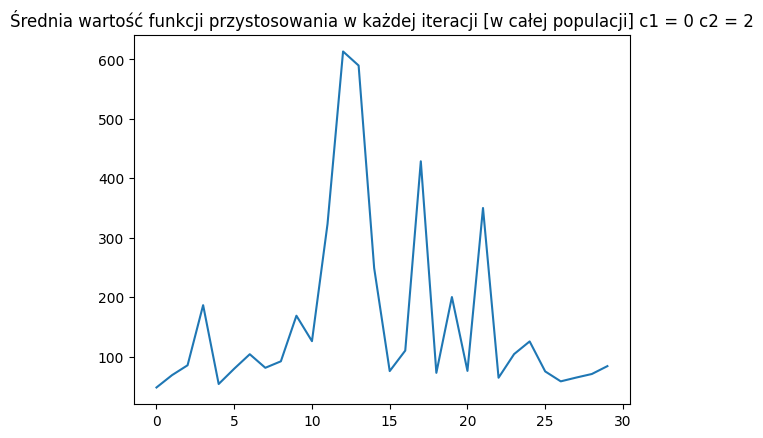

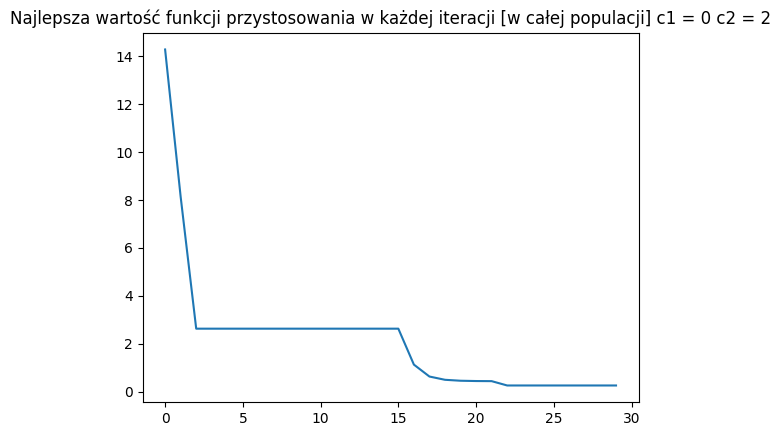


Rozwiązanie: [-0.01999186 -0.0471454 ]
Wartość funkcji przystosowania: 0.2527897788970254
------------------------------------------------------------------------------------
Czas działania: 0.007969379425048828


In [62]:
import numpy as np
import math
import time
# zdefiniowanie funkcji przystosowania
def sphere(x):
    return x[0]**2 + x[1]**2 - 20*(math.cos(math.pi*x[0]) + math.cos(math.pi*x[1]) - 2)


# stwórzmy tablice do wyrysowania później przebiegu algorytmu
avgs = []
bests_fitness = []

# zdefiniowanie algorytmu roju cząstek
def pso(cost_func, dim=2, num_particles=30, max_iter=30, w=0.5, c1=1, c2=2):
    
    # zainicjowanie cząstek i ich prędkości
    particles = np.random.uniform(-5.12, 5.12, (num_particles, dim))
    velocities = np.zeros((num_particles, dim))

    # inicjalizacja najlepszych pozycji cząstek oraz funkcji przystosowania (fitness function)
    best_positions = np.copy(particles)
    best_fitness = np.array([cost_func(p) for p in particles])
    swarm_best_position = best_positions[np.argmin(best_fitness)]
    swarm_best_fitness = np.min(best_fitness)

    # iterujemy sie przez podana w funkcji ilosc iteracji, aktualizujac prednosci i pozycji każdej z cząstek
    for i in range(max_iter):
        # aktualizacja wartości prędkości cząstek
        r1 = np.random.uniform(0, 1, (num_particles, dim))
        r2 = np.random.uniform(0, 1, (num_particles, dim))
        velocities = w * velocities + c1 * r1 * (best_positions - particles) + c2 * r2 * (swarm_best_position - particles)

        # aktualizacja pozycji cząstek
        particles += velocities

        # ewaluacja funkcji przystosowania dla każdej z cząstek
        fitness_values = np.array([cost_func(p) for p in particles])
        
        # zapisujemy średnią wartość funkcji przystosowania w roju
        avgs.append(np.mean(fitness_values))
        # aktualizacja najlepszych pozycji i funkcji przystosowania
        improved_indices = np.where(fitness_values < best_fitness)
        best_positions[improved_indices] = particles[improved_indices]
        best_fitness[improved_indices] = fitness_values[improved_indices]
        if np.min(fitness_values) < swarm_best_fitness:
            swarm_best_position = particles[np.argmin(fitness_values)]
            swarm_best_fitness = np.min(fitness_values)
            
        # zapisujemy najlepszą wartość funkcji przystosowania
        bests_fitness.append(swarm_best_fitness)
    # zwrócenie najlepszego wyniku znalezionego przez algorytm
    return swarm_best_position, swarm_best_fitness

# uruchomienie algorytmu PSO dla wybranej funkcji
start = time.time()
solution, fitness = pso(sphere, c1 = 2.2, c2 = 2.2)
end = time.time()
import matplotlib.pyplot as plt
plt.plot(avgs)
plt.title("Średnia wartość funkcji przystosowania w każdej iteracji [w całej populacji] c1 = " + str(0) + " c2 = " + str(2))
plt.show()
print()
plt.plot(bests_fitness)
plt.title("Najlepsza wartość funkcji przystosowania w każdej iteracji [w całej populacji] c1 = " + str(0) + " c2 = " + str(2))
plt.show()
print()
print('Rozwiązanie:', solution)
print('Wartość funkcji przystosowania:', fitness)
print('------------------------------------------------------------------------------------')
print("Czas działania: "+ str(end - start))

In [ ]:
print("c1 = 0 c2 = 2")
data = [0.07528912244616505, 6.668989157075029, 1.075199603890039, 1.237791211947032, 0.23224004704230175, 5.304287106921066, 4.293242642895767, 4.871727362590786, 4.257326389670102, 0.021646687483040973]
print("Średnia: " + str(np.mean(data)))
print("Odchylenie standardowe: " + str(math.sqrt(np.var(data))))

print("\nc1 = 2 c2 = 0")
data = [12.11683276326104, 37.2385635332948, 10.469187790720722, 20.813796037133393, 14.105527227933326, 9.430179644481807, 28.69318282716101, 17.381109910662087, 27.542755555491784, 17.70990182146126]
print("Średnia: " + str(np.mean(data)))
print("Odchylenie standardowe: " + str(math.sqrt(np.var(data))))

print("\nc1 = 2.2 c2 = 2.2")
data = [0.2778565849306619, 0.7545315000390712, 0.291934352499097, 0.05256800008792692, 0.21681556271426647, 0.0007577292368086277, 0.0022061616788567663, 0.33189200126907137, 2.4685878470630254, 0.3803611034216294]
print("Średnia: " + str(np.mean(data)))
print("Odchylenie standardowe: " + str(math.sqrt(np.var(data))))

print("\nc1 = 2.2 c2 = 2.2 w = 0.2")
[3.9598649069564495, 1.6990497835289829e-06, 0.00011623533589044445, 1.4416348001748704e-05, 0.004827075519968799, 0.0007216205797299336, 3.959864903424678, 0.004857082291362891, 0.0034317750853769917, 1.5486070193579305e-06]
print("Średnia: " + str(np.mean(data)))
print("Odchylenie standardowe: " + str(math.sqrt(np.var(data))))

print("\nc1 = 2.2 c2 = 2.2 w = 0.5")
[0.002058072177135801, 0.00036436579137099956, 0.03169758321070727, 0.02841536238721053, 0.17876619847660066, 0.005559050827810474, 0.005013432924603069, 0.005586898891141336, 0.029250663501962492, 0.044401994501867534]
print("Średnia: " + str(np.mean(data)))
print("Odchylenie standardowe: " + str(math.sqrt(np.var(data))))

print("\nc1 = 2.2 c2 = 2.2 w = 0.8")
[1.7766352509499894, 4.124944272159607, 0.1010247795285029, 4.006359185096476, 0.5588397684057911, 4.282037522270588, 1.4855971079060535, 0.35547093934385776, 2.6386276354847955, 2.086928827464828]
print("Średnia: " + str(np.mean(data)))
print("Odchylenie standardowe: " + str(math.sqrt(np.var(data))))

c1 = 0 c2 = 2
Średnia: 2.803773933196133
Odchylenie standardowe: 2.388265835759801

c1 = 2 c2 = 0
Średnia: 19.550103711160126
Odchylenie standardowe: 8.601282535980365

c1 = 2.2 c2 = 2.2
Średnia: 0.47775108429404145
Odchylenie standardowe: 0.6962626946353907

c1 = 2.2 c2 = 2.2 w = 0.2
Średnia: 0.47775108429404145
Odchylenie standardowe: 0.6962626946353907

c1 = 2.2 c2 = 2.2 w = 0.5
Średnia: 0.47775108429404145
Odchylenie standardowe: 0.6962626946353907

c1 = 2.2 c2 = 2.2 w = 0.8
Średnia: 0.47775108429404145
Odchylenie standardowe: 0.6962626946353907


Najlepiej spisał się wariant c1 = c2 = 2.2. Myślę, że wynikało to z faktu, że funkcja posiadała wiele minimów lokalnych

Zad 2

In [56]:
import math
import random

class Solution:
  def __init__(self, randomize_genes = False):
    self.genesX = [0] * 16
    self.genesY = [0] * 16
    if randomize_genes:
     for i in range(8):
        self.genesX[i] = 1
        self.genesY[i] = 1

  # funkcja przystosowania:
  def get_adaptation(self):
    x = int("".join(str(x) for x in self.genesX), 2) / 2.**16
    y = int("".join(str(x) for x in self.genesY), 2) / 2.**16
    return x**2 + y**2 - 20*(math.cos(math.pi*x) + math.cos(math.pi*y) - 2)
  
  # krzyżowanie jednopunktowe z innym osobnikiem:
  def crossover(self, other_solution):
    new_solution = Solution()

    cut_position = random.randint(0,15)
    new_solution.genesX[0:cut_position] = self.genesX[0:cut_position]
    new_solution.genesX[cut_position:] = other_solution.genesX[cut_position:]

    cut_position = random.randint(0,15)
    new_solution.genesY[0:cut_position] = self.genesY[0:cut_position]
    new_solution.genesY[cut_position:] = other_solution.genesY[cut_position:]
    return new_solution

  # mutacja przez obrót bitu na losowej pozycji:
  def mutation(self):
    mutation_position = random.randint(0,15)
    if self.genesX[mutation_position] == 1:
      self.genesX[mutation_position] = 0
    else:
      self.genesX[mutation_position] = 1

    mutation_position = random.randint(0,15)
    if self.genesY[mutation_position] == 1:
      self.genesY[mutation_position] = 0
    else:
      self.genesY[mutation_position] = 1

In [63]:
# inicjalizujemy parametry:
population_size = 30
iterations = 30
mutation_chance = 0.2

# generujemy populację:
population = [Solution(randomize_genes = True) for i in range(population_size)]

# najlepszy osobnik znaleziony w ciągu całego algorytmu (na razie włóżmy tu zerowego):
best_solution = Solution(randomize_genes = True)
best_solution_adaptation = best_solution.get_adaptation()
best_iteration_found = 0

# stwórzmy tablice do wyrysowania później przebiegu algorytmu
avgs = []
bests_local = []
bests_global = []

start = time.time()
for iteration in range(iterations):
  # tworzymy koło ruletki - każdemu osobnikowi odpowiada jego funkcja przystosowania
  adaptations = [p.get_adaptation() for p in population]

  # zapiszmy najlepszego osobnika
  local_best_solution = population[adaptations.index(min(adaptations))]
  if local_best_solution.get_adaptation() < best_solution_adaptation:
    best_solution = local_best_solution
    best_solution_adaptation = local_best_solution.get_adaptation()
    best_iteration_found = iteration

  # zapiszmy dane
  avgs.append(sum(adaptations) / len(adaptations))
  bests_local.append(min(adaptations))
  bests_global.append(best_solution_adaptation)

  # tworzymy koło ruletki na podstawie funkcji przystosowania
  roulette_wheel = adaptations
  # dokonujemy normalizacji wyników, żeby w późniejszym etapie działania algorytmu dalej pojawiały się różnice między osobnikami
  for i in range(len(roulette_wheel)):
    roulette_wheel[i] -= min(adaptations)
    roulette_wheel[i] /= (max(adaptations)-min(adaptations))

  # tworzymy z populacji dwie listę, ważoną kołem ruletki
  parents = [random.choices(population, weights=roulette_wheel, k = 2) for i in range(population_size)]

  # tworzymy dzieci z par rodziców
  children = [p[0].crossover(p[1]) for p in parents]

  # dokonujemy losowej mutacji wśród dzieci
  for c in children:
    if random.random() < mutation_chance:
      c.mutation()

  # zastępujemy poprzednią populację:
  population = children

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# sprawdźmy najlepszego osobnika po ostatnich zmianach populacji:
adaptations = [p.get_adaptation() for p in population]
local_best_solution = population[adaptations.index(min(adaptations))]
if local_best_solution.get_adaptation() < best_solution_adaptation:
  best_solution = local_best_solution
  best_solution_adaptation = local_best_solution.get_adaptation()

end = time.time()
# wypiszmy najlepszego osobnika:

print('---')
print('Best solution X: ', best_solution.genesX, ' = ', int("".join(str(x) for x in best_solution.genesX), 2) / 2**16.)
print('Best solution Y: ', best_solution.genesY, ' = ', int("".join(str(x) for x in best_solution.genesY), 2) / 2**16.)
print('Found in iteration: ', best_iteration_found)
print('Largest function value found: ', best_solution_adaptation)
print("Czas działania: "+ str(end - start))

---
Best solution X:  [0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]  =  0.18359375
Best solution Y:  [0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0]  =  0.4344482421875
Found in iteration:  25
Largest function value found:  19.368270369123564
Czas działania: 0.07621979713439941


Rozwiązanie znaleziona za pomocą algorytmu roju: [-0.01194009  0.00553255] <br>
Rozwiązanie znalezione za pomocą algorytu genetycznego: [0.390869140625 0.46533203125] <br>
Algorytm roju cąstek był 10 razy szybszy (0.007969379425048828 vs 0.07621979713439941)